## 1. Importaciones y lecturas 

In [ ]:
#https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243

Leemos la base y nos quedamos con columnas relevantes

In [ ]:
data = pd.read_csv('NYPD_Complaint_Data_Historic.csv')
data = data[['CMPLNT_FR_DT', 'OFNS_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX',
                         'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX',
                        'Latitude', 'Longitude']]

In [ ]:
data['OFNS_DESC'].unique()

In [ ]:
values = ['RAPE', 'HARRASSMENT 2', 'KIDNAPPING & RELATED OFFENSES', 'SEX CRIMES',
          'HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'LOITERING/DEVIATE SEX', 'KIDNAPPING AND RELATED OFFENSES',
          'KIDNAPPING', 'FELONY SEX CRIMES']
data = data[data['OFNS_DESC'].isin(values)]

In [ ]:
data = data[(data['SUSP_SEX'] == 'M') & (data['VIC_SEX'] == 'F')]

In [ ]:
data['geometry'] = data.apply(lambda x: Point(x['Longitude'], x['Latitude']), axis=1)
big_crimes = gpd.GeoDataFrame(data, geometry='geometry')

In [ ]:
big_crimes

In [ ]:
big_crimes['CMPLNT_FR_DT'] = pd.to_datetime(big_crimes['CMPLNT_FR_DT'], errors='coerce')

# Extract the year from each date
big_crimes['year'] = big_crimes['CMPLNT_FR_DT'].dt.year

# Plot the histogram
plt.hist(big_crimes['year'], bins=range(1973, 2024), edgecolor='black')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Histogram of Crime Notifications by Year')

Podemos ver que La gran masa de crimenes la tenemos desde 2010. Dado a el volumend e datos que tenemos, nos quedaremos solo con los datos posteriores al año ___

In [ ]:
data_2022 = big_crimes[big_crimes['year'] >= 2022]

In [ ]:
len(data_2022)

Podemos ver que Luego de filtrar, solo para el 2022 ya tenemos 33000 datos! 

In [ ]:
data_2022['month'] = data_2022['CMPLNT_FR_DT'].dt.month

# Plot the histogram
plt.hist(data_2022['month'], bins=range(1, 13), edgecolor='black')

unique_months = sorted(data_2022['month'].unique())

# Plot the histogram
plt.hist(data_2022['month'], bins=range(1, 14), edgecolor='black')

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Histogram of Crime Notifications by Month')

# Set x-axis tick labels to month names
month_names = pd.date_range(start='2022-01', periods=len(unique_months), freq='M').strftime('%b')
plt.xticks(unique_months, month_names)

In [ ]:
import geopandas as gpd 
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [ ]:
a = gpd.read_file('datasets/NYPD Complaint Data Current (Year To Date)/nypd_crimes.shp')

In [ ]:
a.head()

In [ ]:
a.columns

## 2. Filtrado

### 2.1 Crimenes desde hombreas a mujeres

In [ ]:
data = a[(a['susp_sex'] == 'M') & (a['vic_sex'] == 'F')]

In [ ]:
remove = ['lat_lon_ad','lat_lon_ci','lat_lon_st','lat_lon_zi']

In [ ]:
ref_data = data.drop(columns=remove)

In [ ]:
ref_data.drop_duplicates(inplace=True)

In [ ]:
ref_data['ky_cd']

In [ ]:
ref_data.to_file("crimes_filtered.shp", driver="ESRI Shapefile")

### 2.2 Subconjunto de crimenes que se considerarán violencia de genero

Olvidamos guardar esta parte, pero el dataset ya está filtrado :)

### 2.3 Según fecha de denuncia

In [ ]:
useful_crimes = gpd.read_file('filtered dataset/crimes_filtered.shp')
useful_crimes.to_crs('EPSG:4326', inplace=True)

In [ ]:
useful_crimes['date_cmpln'] = pd.to_datetime(useful_crimes['date_cmpln'])

# Extract the year from each date
useful_crimes['year'] = useful_crimes['date_cmpln'].dt.year

# Plot the histogram
plt.hist(useful_crimes['year'], bins=range(1973, 2024), edgecolor='black')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Histogram of Crime Notifications by Year')


In [ ]:
fech = useful_crimes[['date_cmpln', 'year']]
fech[fech['year'] <= 2022]

Dado que solo hay 623 datos antes de 2023, removemos y solo nos quedamos con los de este año.

In [ ]:
useful_crimes = useful_crimes[useful_crimes['year'] == 2023]

In [ ]:
useful_crimes

In [ ]:
useful_crimes.columns

In [ ]:
useful_crimes = useful_crimes[['date_cmpln', 'ofns_desc', 'susp_age_g', 'susp_race',
                               'vic_race', 'susp_sex', 'vic_age_gr', 'longitude', 'latitude',
                               'year', 'month', 'geometry']]

Teneemos data para todo el año! Desconozco que es lo azul que sobresale de noviembre. Ahora guardamos este gdf

In [35]:
data_2022.to_file("NYPD_violence_against_women.gpkg", driver="GPKG")

In [36]:
data_2022

,CMPLNT_FR_DT,OFNS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude,geometry,year,month
96,2022-01-07,RAPE,UNKNOWN,BLACK,M,18-24,BLACK,F,40.887314,-73.847272,POINT (-73.84727 40.88731),2022.0,1
97,2022-01-09,RAPE,25-44,BLACK,M,25-44,BLACK,F,40.887314,-73.847272,POINT (-73.84727 40.88731),2022.0,1
7799471,2022-01-20,RAPE,<18,BLACK,M,<18,BLACK HISPANIC,F,40.822912,-73.870041,POINT (-73.87004 40.82291),2022.0,1
7821208,2022-01-01,HARRASSMENT 2,UNKNOWN,UNKNOWN,M,65+,WHITE HISPANIC,F,40.650402,-73.963258,POINT (-73.96326 40.65040),2022.0,1
7821255,2022-01-01,SEX CRIMES,25-44,ASIAN / PACIFIC ISLANDER,M,25-44,WHITE,F,40.737203,-73.983273,POINT (-73.98327 40.73720),2022.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8352972,2022-12-31,HARRASSMENT 2,UNKNOWN,UNKNOWN,M,25-44,WHITE HISPANIC,F,40.757657,-73.875325,POINT (-73.87533 40.75766),2022.0,12
8352979,2022-12-30,SEX CRIMES,25-44,BLACK,M,<18,BLACK,F,40.682398,-73.840072,POINT (-73.84007 40.68240),2022.0,12
8352995,2022-12-31,HARRASSMENT 2,25-44,BLACK,M,25-44,BLACK,F,40.669766,-73.865736,POINT (-73.86574 40.66977),2022.0,12
8353036,2022-12-31,HARRASSMENT 2,25-44,BLACK,M,18-24,BLACK,F,40.682495,-73.924308,POINT (-73.92431 40.68250),2022.0,12


In [2]:
data = gpd.read_file('NYPD_violence_against_women.gpkg')

<Axes: >

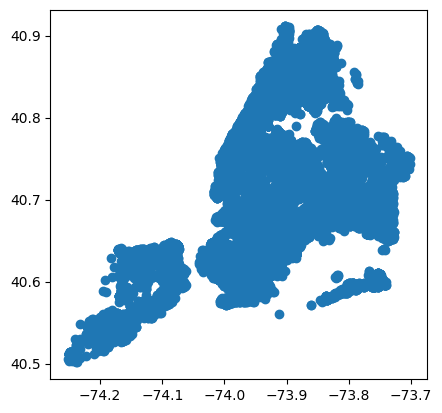

In [3]:
data.plot()